# Novel Corona Virus 2019 Dataset Analysis

Bu projede, Kaggle üzerinde bulunan Novel Corona Virus 2019 Dataset veri seti kullanılarak COVID-19 verileri analiz edilecektir. Amaç, farklı bölgelerdeki vaka sayıları, ölüm oranları ve diğer önemli sağlık metriklerini inceleyerek pandemi sürecine dair anlamlı çıkarımlar yapmaktır. Veri seti, dünya genelindeki vaka sayıları, ölümler ve iyileşen hastalar gibi verileri içerdiğinden, bu veriler üzerinden salgının yayılma hızı, ölüm oranları ve iyileşme oranları analiz edilecektir.

Proje kapsamında, veri setinin ilk incelenmesi, eksik verilerin analizi ve veri temizleme işlemleri yapılacak, ardından keşifsel veri analizi (EDA) ile bölgesel farklar ve ilişkiler değerlendirilecektir. Elde edilen bulgular, sağlık politikaları ve kaynak yönetimi üzerine öneriler geliştirmek için kullanılacaktır. Bu analiz, COVID-19’un sağlık sistemleri üzerindeki etkisini anlamak ve gelecekteki salgınlara yönelik stratejiler geliştirmek amacıyla önemli bir kaynak sunmaktadır.

![](https://advocacy.sba.gov/wp-content/uploads/2023/01/coronavirus-market-crash-and-financial-crisis.jpg_s1024x1024wisk20cBT6Q_j97f0iTfusNCEO2DCkN-5DrEj90eVTIrJFIV7w-750x430.jpg)
### Proje Adımları
1. **Kütüphanelerin Yüklenmesi ve Veri Setinin İlk İncelemesi**

2. **Eksik Veri Oluşturmadan Önceki Veri Analizi**

3. **Veri Setine Eksik Verilerin Eklenmesi**

4. **Keşifsel Veri Analizi (EDA)**

5. **Eksik Verilerin Temizlenmesi**

6. **İstatistiksel Analiz ve Görselleştirme**

7. **Sonuçlar ve Öneriler**

# 1. Kütüphanelerin Yüklenmesi ve Veri Setinin İlk İncelemesi

Bu adımda, projede kullanılacak temel kütüphaneler yüklenmiş ve veri seti Kaggle'dan indirilip yüklenmiştir. Veri setini yükledikten sonra, verinin genel yapısını anlamak için aşağıdaki işlemler gerçekleştirilmiştir:

1. **İlk Satırların İncelemesi:** Veri setinin ilk 5 satırı incelenmiştir. Bu işlem, veri setinin yapısını hızlıca anlamamıza yardımcı olmuştur. İlk satırlar, hangi sütunların yer aldığını ve bu sütunların hangi türde veriler içerdiğini görmek için faydalıdır.

2. **Sütunlar ve Türleri:** Veri setindeki her sütunun veri tipi analiz edilmiştir. Sayısal sütunlar (örneğin, 'Confirmed', 'Deaths', 'Recovered') ile kategorik sütunlar (örneğin, 'Country/Region', 'Province/State') arasındaki farklar belirlenmiştir. Sayısal verilerle yapılan hesaplamalar ve analizler, kategorik verilerle yapılan gruplama ve frekans analizlerinden farklıdır, bu yüzden veri tiplerinin doğru tespiti önemlidir.

3. **Eksik Değerler:** Veri setindeki eksik değerlerin sayısı ve hangi sütunlarda eksiklik olduğu belirlenmiştir. Bu adımda, eksik verilerle ilgili herhangi bir işlem yapılmamış, yalnızca eksik veri oranları ve hangi sütunlarda eksik verilerin bulunduğu raporlanmıştır. Bu analiz, ilerleyen adımlarda eksik verilerle nasıl başa çıkılacağına karar vermek için temel bir adım olarak kullanılmıştır.

4. **İstatistiksel Özet:** Veri setindeki sayısal sütunlar için temel istatistiksel özetler çıkarılmıştır. Bu özet, her sayısal değişkenin ortalama, standart sapma, maksimum, minimum değerleri gibi temel istatistiksel bilgileri içerir. Bu sayede verilerin dağılımı hakkında genel bir fikir edinilmiş, aşırı uç değerler (outliers) ve olası veri bozuklukları hakkında ipuçları elde edilmiştir.

In [46]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# FutureWarning uyarılarını devre dışı bırakma
warnings.filterwarnings("ignore", category=FutureWarning)

# Veri setinin yüklenmesi
data = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')

# Veri setinin ilk beş satırının incelenmesi
print("Veri setinin ilk 5 satırı:")
print(data.head())

# Veri setindeki sütunlar ve türleri
print("\nVeri setindeki sütunlar ve türleri:")
print(data.info())

# Eksik değerlerin genel görünümü
print("\nVeri setindeki eksik değerlerin sayısı:")
print(data.isnull().sum())

# Temel istatistiksel özet
print("\nVeri setinin temel istatistiksel özeti:")
print(data.describe(include='all'))

Veri setinin ilk 5 satırı:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  

Veri setindeki sütunlar ve türleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-nul

# 2. Eksik Veri Oluşturmadan Önceki Veri Analizi

Eksik verilerle çalışmadan önce, veri setindeki mevcut eksikliklerin ve veri yapısının ayrıntılı bir şekilde incelenmesi önemlidir. Bu adımda aşağıdaki işlemler gerçekleştirilmiştir:

1. **Benzersiz Değerlerin İncelenmesi:** Her sütunun benzersiz değer sayısı kontrol edilmiştir. Özellikle kategorik değişkenler için, her kategorinin kaç kez tekrarlandığı gözlemlenmiştir. Örneğin, 'Country/Region' sütununda hangi ülkelerin daha fazla temsil edildiği, hangi bölgelere ait verilerin daha az bulunduğu gibi bilgiler elde edilmiştir.

2. **Sayısal ve Kategorik Sütunların Dağılımı:** Sayısal sütunlar (Confirmed, Deaths, Recovered) histogramlar ve Kernel Density Estimation (KDE) kullanılarak görselleştirilmiştir. Bu görselleştirmeler, her sayısal sütunun dağılımını anlamamıza yardımcı olmuştur. Ayrıca, kategorik sütunlardaki dağılımlar, örneğin 'Country/Region' sütunundaki en fazla vaka görülen ülkeler hakkında bilgi sağlamıştır.

3. **Kategorik Değişkenlerin Dağılımı:** Kategorik değişkenlerin (örneğin, 'Country/Region' ve 'Province/State') frekans dağılımı analiz edilmiştir. Bu, hangi ülkelerin veya bölgelerin veri setinde daha fazla temsil edildiğini ve daha fazla vaka bildirdiğini anlamamıza olanak tanımıştır. Ayrıca, bu değişkenlerin analiz edilmesi, veri setindeki dengesiz dağılımları veya eksiklikleri tespit etmemize yardımcı olabilir.

4. **Eksik Veri Dağılımı:** Veri setinde eksik verilerin hangi sütunlarda yoğunlaştığı incelenmiştir. Bu, hangi sütunların eksik veri içerdiğini ve bu eksikliklerin analiz sırasında nasıl ele alınması gerektiğini belirlemek için gereklidir. Eksik veri analizi, veri setinin temizlenmesi ve işlenmesi için kritik bir adımdır.


Her sütunun benzersiz değer sayısı:
SNo                306429
ObservationDate       494
Province/State        736
Country/Region        229
Last Update          1905
Confirmed          107146
Deaths              20089
Recovered           74541
dtype: int64

'SNo' sütununun ilk 5 benzersiz değeri:
[1 2 3 4 5]

'ObservationDate' sütununun ilk 5 benzersiz değeri:
['01/22/2020' '01/23/2020' '01/24/2020' '01/25/2020' '01/26/2020']

'Province/State' sütununun ilk 5 benzersiz değeri:
['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu']

'Country/Region' sütununun ilk 5 benzersiz değeri:
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US']

'Last Update' sütununun ilk 5 benzersiz değeri:
['1/22/2020 17:00' '1/23/20 17:00' '1/24/20 17:00' '1/25/20 17:00'
 '1/26/20 16:00']

'Confirmed' sütununun ilk 5 benzersiz değeri:
[ 1. 14.  6.  0. 26.]

'Deaths' sütununun ilk 5 benzersiz değeri:
[ 0. 17. 24.  1. 40.]

'Recovered' sütununun ilk 5 benzersiz değeri:
[ 0. 28.  2. 31.  1.]

'Country/Region' sütunun

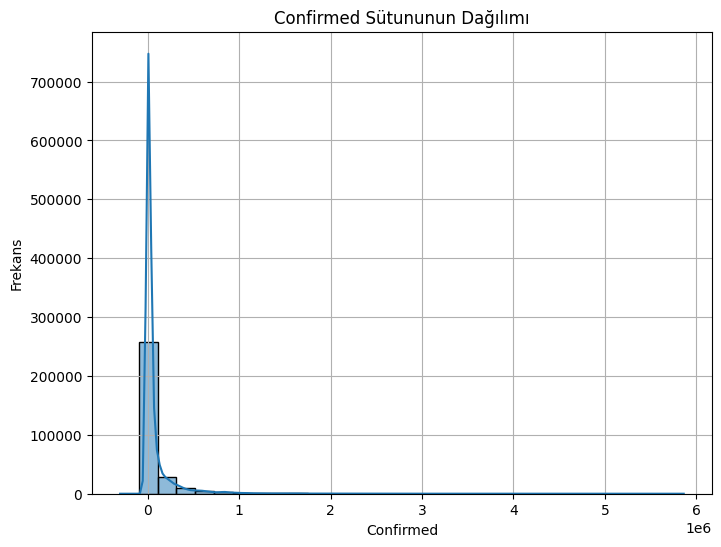

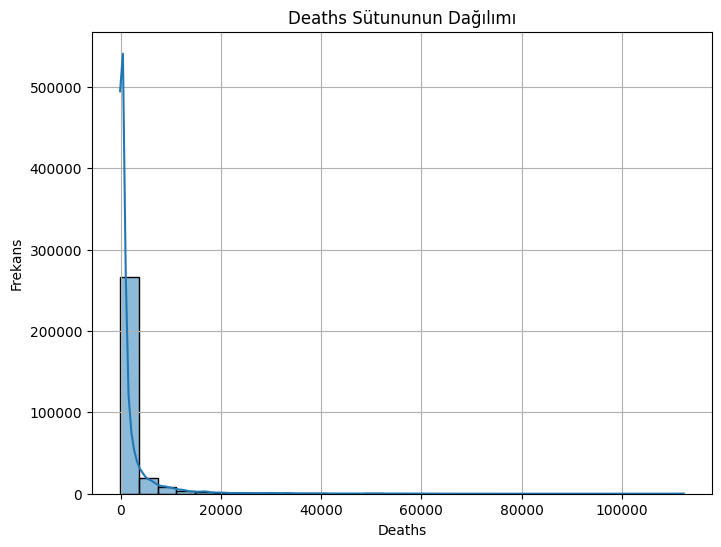

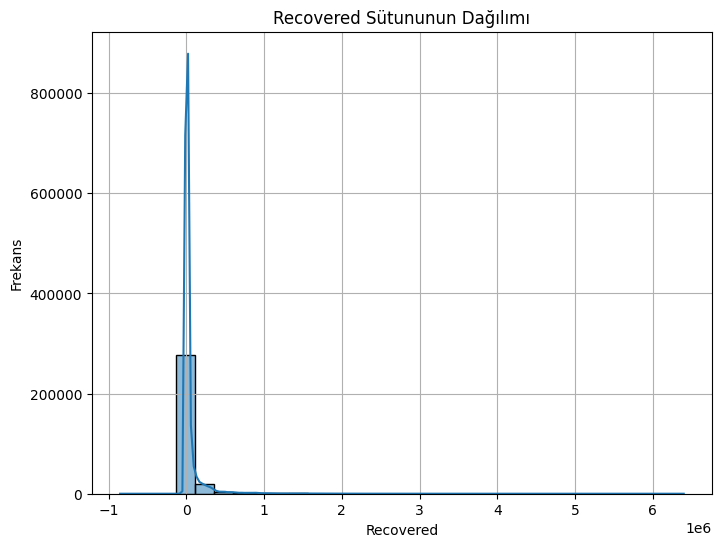

In [47]:
# Her sütunun benzersiz değer sayısı
print("\nHer sütunun benzersiz değer sayısı:")
print(data.nunique())

# Sütun bazında örnek değerler
for column in data.columns:
    print(f"\n'{column}' sütununun ilk 5 benzersiz değeri:")
    print(data[column].unique()[:5])

# Kategorik değişkenlerin dağılımı
categorical_columns = ['Country/Region', 'Province/State']
for column in categorical_columns:
    print(f"\n'{column}' sütununun değer dağılımı:")
    print(data[column].value_counts())

# Sayısal sütunların dağılımı (histogram)
numerical_columns = ['Confirmed', 'Deaths', 'Recovered']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'{column} Sütununun Dağılımı')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.grid(True)
    plt.show()

# 3. Veri Setine Eksik Verilerin Eklenmesi

Gerçek dünya verilerinde eksik veri problemi sıklıkla karşılaşılan bir durumdur. Bu adımda, veri setine eksik veriler eklenmiş ve bunun etkisi gözlemlenmiştir. Eksik veri eklemek, veri setinin analizi ve modelleme sürecinde karşılaşılabilecek eksik veri problemlerini anlamaya yardımcı olur. Aşağıdaki adımlar uygulanmıştır:

1. **Eksik Veri Ekleme:** Veri setine, her sayısal sütunun %2 oranında eksik veri eklenmiştir. Bu işlem, veri setindeki her sütunun rastgele seçilen %2'sine NaN (eksik) değerleri yerleştirerek yapılmıştır. Bu, doğal olarak eksik verilerin olduğu durumları simüle etmek için kullanılan yaygın bir tekniktir.

2. **Eksik Veri Sonrası Durumun İncelenmesi:** Veri setine eksik veri ekledikten sonra, hangi sütunlarda ne kadar eksiklik bulunduğu kontrol edilmiştir. Bu adımda, veri setinin eksik veri oranları detaylı bir şekilde hesaplanmış ve görselleştirilmiştir. Bu, eksik veri oranlarının modelleme sürecine etkisini gözlemlememize olanak tanır.


In [48]:
# Eksik veri oluşturma fonksiyonu
def add_missing_values(data, missing_rate=0.02):
    """
    Veri setine eksik değer ekler.
    :param data: pd.DataFrame
    :param missing_rate: Eksik veri oranı (0.01 - 0.03 arası önerilir)
    """
    data_with_na = data.copy()
    np.random.seed(42)
    for col in data_with_na.columns:
        if data_with_na[col].dtype in [np.float64, np.int64]:
            missing_count = int(missing_rate * len(data_with_na))
            missing_indices = np.random.choice(data_with_na.index, missing_count, replace=False)
            data_with_na.loc[missing_indices, col] = np.nan
    return data_with_na

# Eksik veri oranını %2 olarak belirleyip veri setine uygulama
data_with_na = add_missing_values(data, missing_rate=0.02)

# Eksik veri oluşturulduktan sonra durumun incelenmesi
print("\nEksik veri oluşturulduktan sonra sütun bazında eksiklik oranları (%):")
print(data_with_na.isnull().mean() * 100)


Eksik veri oluşturulduktan sonra sütun bazında eksiklik oranları (%):
SNo                 1.999811
ObservationDate     0.000000
Province/State     25.488123
Country/Region      0.000000
Last Update         0.000000
Confirmed           1.999811
Deaths              1.999811
Recovered           1.999811
dtype: float64


# 4. Keşifsel Veri Analizi (EDA)

Keşifsel veri analizi (EDA), verinin temel yapısını anlamak, desenleri keşfetmek ve verilerdeki önemli ilişkileri incelemek için kullanılan kritik bir adımdır. Bu aşamada aşağıdaki işlemler gerçekleştirilmiştir:

1. **Veri Setinin Yapısının İncelenmesi:** Veri seti, özellikle sayısal ve kategorik değişkenler açısından daha derinlemesine incelenmiştir. Veri setinin genel yapısı (sütunlar, veri tipleri, eksik değerler) tekrar gözden geçirilmiştir. Bu adımda, veri setindeki eksik verilerin kontrolü ve genel yapı hakkında bilgi edinilmiştir.

2. **Sayısal Sütunların Görselleştirilmesi:** Her sayısal sütun için histogramlar ve KDE (Kernel Density Estimation) grafikleri kullanılarak dağılımlar incelenmiştir. Bu adım, verilerin nasıl dağıldığını anlamamıza ve veri setindeki aşırı uç değerleri (outliers) fark etmemize yardımcı olmuştur.

3. **Korelasyon Analizi:** Sayısal sütunlar arasındaki ilişkiler korelasyon matrisiyle incelenmiştir. Vaka sayısı, ölüm oranı ve iyileşen oranı arasındaki ilişkiler incelenerek hangi değişkenlerin birbiriyle güçlü bir şekilde ilişkilendiği gözlemlenmiştir. Bu analiz, modelleme sırasında hangi değişkenlerin önemli olabileceğini belirlememize yardımcı olmuştur.


Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              300301 non-null  float64
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        300301 non-null  float64
 6   Deaths           300301 non-null  float64
 7   Recovered        300301 non-null  float64
dtypes: float64(4), object(4)
memory usage: 18.7+ MB
None


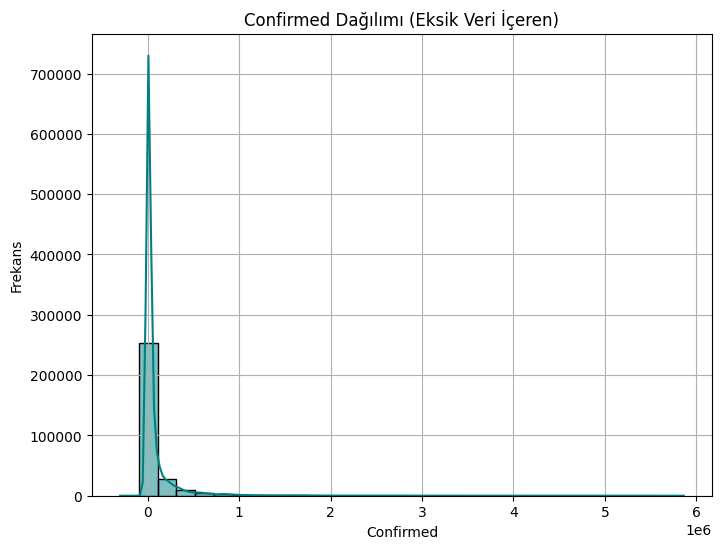

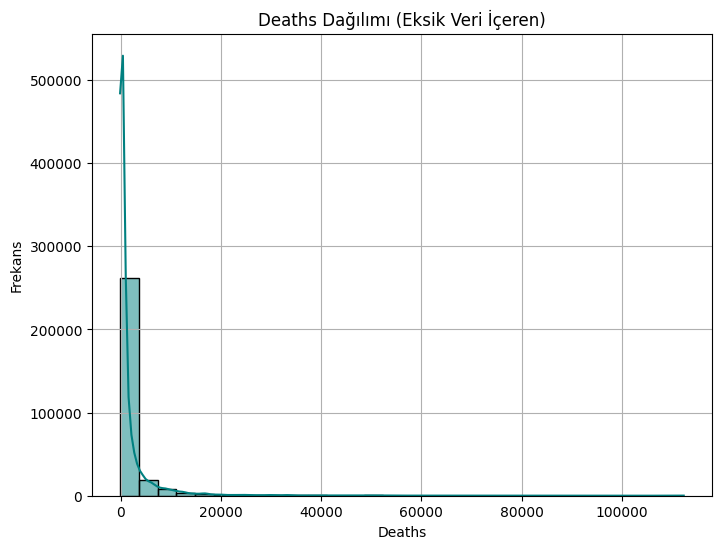

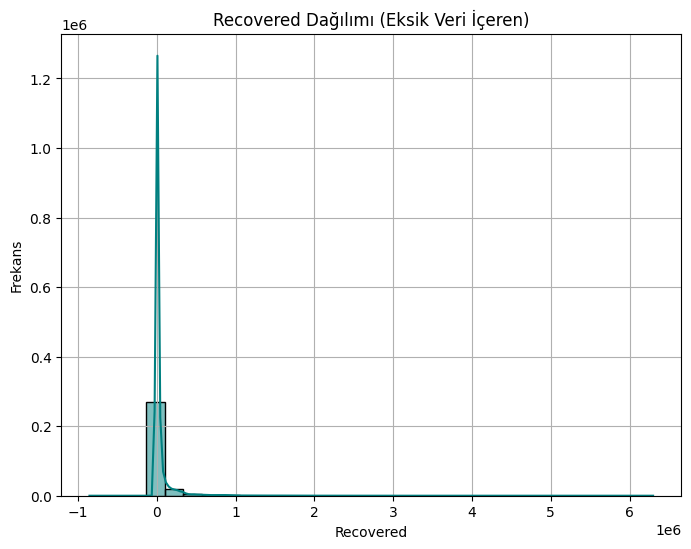

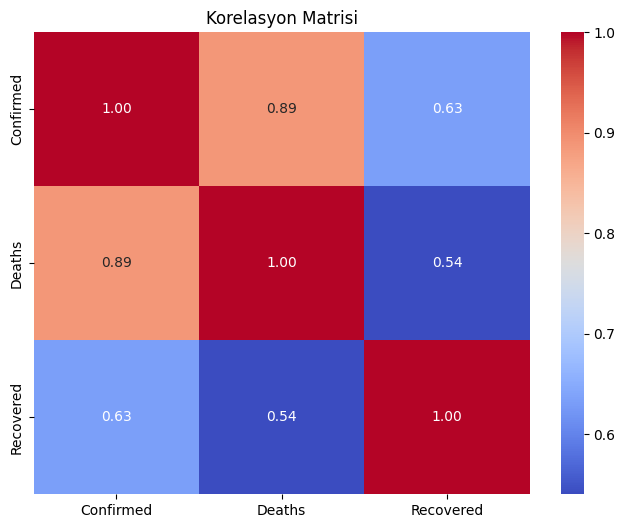

In [49]:
# Veri setinin genel bilgileri
print("\nVeri setinin genel bilgileri:")
print(data_with_na.info())

# Sayısal değişkenlerin dağılımı
numerical_columns = ['Confirmed', 'Deaths', 'Recovered']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_with_na[column], kde=True, bins=30, color='teal')
    plt.title(f'{column} Dağılımı (Eksik Veri İçeren)')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.grid(True)
    plt.show()

# Korelasyon matrisi
correlation_matrix = data_with_na[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

# 5. Eksik Verilerin Temizlenmesi

Eksik verilerle başa çıkmak, veri analizi ve modelleme süreçlerinin başarısı için kritik bir adımdır. Bu adımda, veri setindeki eksik değerler doldurulmuş ve veri seti temizlenmiştir:

1. **Eksik Verilerin Doldurulması:** Eksik veriler, her sütunun ortalama değeriyle doldurulmuştur. Bu, sayısal sütunlar için yaygın bir teknik olup, eksik verilerin modelleme sürecine zarar vermemesi için kullanılmıştır.

2. **Temizleme Sonrası Durumun İncelenmesi:** Veri setindeki eksik veriler temizlendikten sonra, eksikliklerin tekrar kontrolü yapılmış ve veri setinde eksik değer kalmadığı doğrulanmıştır. Bu adım, eksik veri sorununu ortadan kaldırarak verinin güvenilirliğini artırmıştır.


In [50]:
# Sayısal ve sayısal olmayan sütunları ayırt edelim
numeric_columns = data_with_na.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = data_with_na.select_dtypes(exclude=['float64', 'int64']).columns

# 1. Sayısal sütunlarda eksik verileri ortalama ile doldurma
data_with_na[numeric_columns] = data_with_na[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# 2. Sayısal olmayan sütunlarda eksik verileri uygun bir şekilde doldurma (Örneğin 'Unknown')
data_with_na[non_numeric_columns] = data_with_na[non_numeric_columns].apply(lambda x: x.fillna('Unknown'))

# 3. Eksik verilerin tekrar kontrolü
print("\nEksik veri temizlendikten sonra eksiklik durumu:")
print(data_with_na.isnull().sum())

# 4. Veri setinin genel yapısını kontrol etme
print("\nVeri setinin genel bilgileri:")
print(data_with_na.info())


Eksik veri temizlendikten sonra eksiklik durumu:
SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  float64
 1   ObservationDate  306429 non-null  object 
 2   Province/State   306429 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(4), object(4)
memory usage: 18.7+ MB
None


# 6. İstatistiksel Analiz ve Görselleştirme

Bu bölümde, farklı türde grafiklerle veri setinin derinlemesine analizi yapılmıştır:

1. **Toplam Vaka, Ölüm ve İyileşen Sayıları**: Bu grafik, her bir kategori (Confirmed, Deaths, Recovered) için toplam sayıları karşılaştırır.

2. **Ölüm Oranı Dağılımı (Mortality Rate)**: Ölüm oranının nasıl dağıldığını görselleştirir.

3. **Vaka Sayısı ve Ölüm Oranı İlişkisi**: Vaka sayısı ile ölüm sayısı arasındaki ilişkiyi gösterir.

4. **Ölüm Oranı İstatistikleri**: Ölüm oranlarının dağılımını gösterir (box plot).

5. **Kümülatif Vaka Sayısı**: Toplam vaka sayısının zaman içinde nasıl arttığını gösterir.

6. **Vaka Dağılımı (Confirmed)**: Vaka sayısının genel dağılımını görselleştirir.

# 6.1 Toplam Vaka, Ölüm ve İyileşen Sayıları Bar Grafikle Gösterimi
Bu grafik, toplam vaka, ölüm ve iyileşen hasta sayılarını karşılaştıran bir bar grafiğidir. Vaka sayısı, ölüm sayısına göre çok daha yüksek olabilir ve iyileşen hasta sayısı da bu iki kategorinin ortasında yer alır. Bu grafik, COVID-19'un sağlık üzerindeki genel etkisini anlamamıza yardımcı olur.

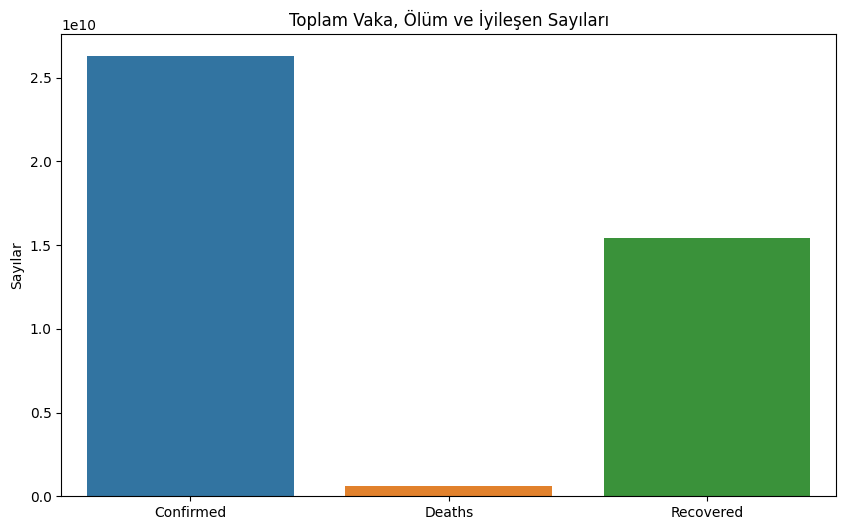

In [51]:
# 6.1. Toplam Vaka, Ölüm ve İyileşen Sayıları
plt.figure(figsize=(10, 6))
sns.barplot(x=['Confirmed', 'Deaths', 'Recovered'], 
            y=[data_with_na['Confirmed'].sum(), data_with_na['Deaths'].sum(), data_with_na['Recovered'].sum()])
plt.title('Toplam Vaka, Ölüm ve İyileşen Sayıları')
plt.ylabel('Sayılar')
plt.show()

# 6.2 Ölüm Oranı Dağılımı (Mortality Rate)
Bu grafik, ülkeler veya bölgeler arasında ölüm oranlarını karşılaştırmak için kullanılır. Ölüm oranlarının dağılımını inceleyerek, hangi bölgelerin daha yüksek ölüm oranlarına sahip olduğunu kolayca görebiliriz. Yüksek ölüm oranları, sağlık hizmetlerinin zorlandığı ve müdahale gerektiren alanları gösterebilir.

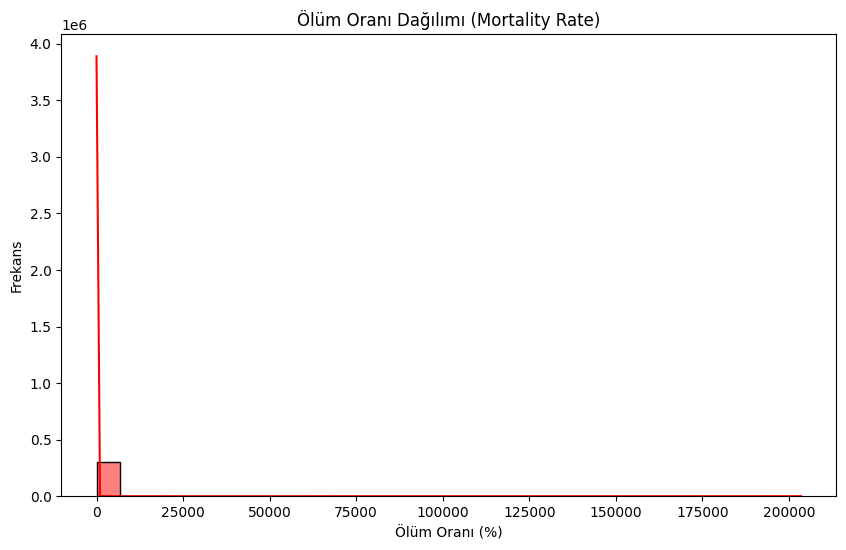

In [52]:
# 6.2. Ölüm Oranı Dağılımı
data_with_na['Mortality Rate'] = (data_with_na['Deaths'] / data_with_na['Confirmed']) * 100
plt.figure(figsize=(10, 6))
sns.histplot(data_with_na['Mortality Rate'], kde=True, color='red', bins=30)
plt.title('Ölüm Oranı Dağılımı (Mortality Rate)')
plt.xlabel('Ölüm Oranı (%)')
plt.ylabel('Frekans')
plt.show()

# 6.3 Vaka Sayısı ile Ölüm Sayısı İlişkisi (Scatter Plot)
Vaka sayısı ile ölüm sayısı arasındaki ilişkiyi görselleştiren scatter plot, pandemi ile ilgili kritik bir analizi sunar. Vaka sayısındaki artışın ölüm oranlarını nasıl etkilediğini inceleyerek, sağlık sisteminin hangi bölgelerde daha fazla stres altında olduğunu anlayabiliriz.

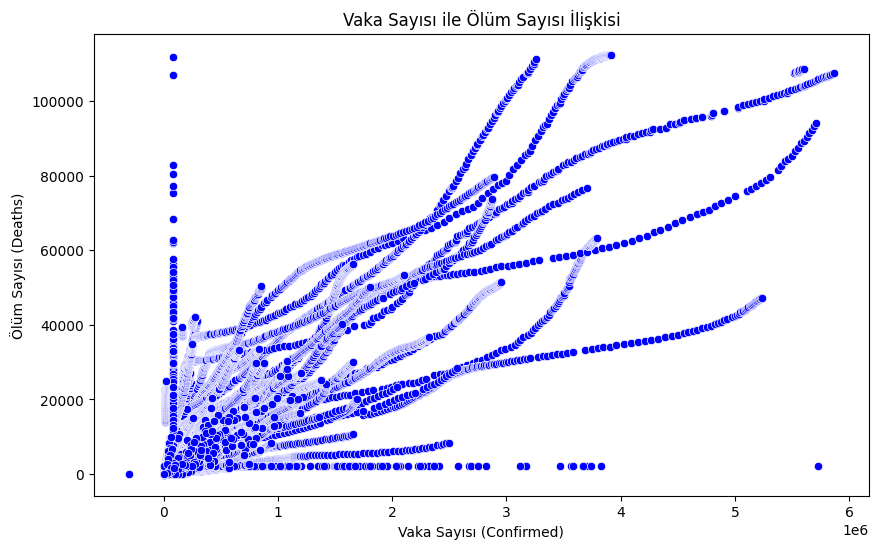

In [53]:
# 6.3. Vaka Sayısı ve Ölüm Oranı İlişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_with_na['Confirmed'], y=data_with_na['Deaths'], color='blue')
plt.title('Vaka Sayısı ile Ölüm Sayısı İlişkisi')
plt.xlabel('Vaka Sayısı (Confirmed)')
plt.ylabel('Ölüm Sayısı (Deaths)')
plt.show()

# 6.4 Ölüm Oranı İstatistikleri (Box Plot)
Box plot, ölüm oranlarının dağılımını gösterir ve ekstrem değerleri (outliers) anlamamıza yardımcı olur. Bu grafik, ölüm oranlarının hangi aralıkta yoğunlaştığını ve hangi bölgelerde daha yüksek değerlerin olduğunu görselleştirir.

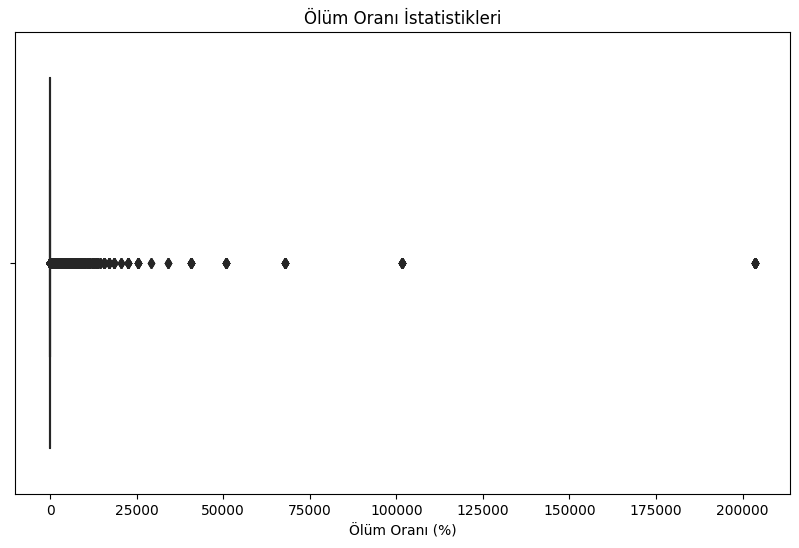

In [54]:
data_with_na = data_with_na[np.isfinite(data_with_na['Mortality Rate'])]
# 6.4. Mortality Rate İstatistikleri
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_with_na, x='Mortality Rate', color='green')
plt.title('Ölüm Oranı İstatistikleri')
plt.xlabel('Ölüm Oranı (%)')
plt.show()

# 6.5 Kümülatif Vaka Sayısı
Kümülatif vaka sayısının zaman içindeki artışını gösteren grafik, pandeminin seyrini izlememize yardımcı olur. Vaka sayısının birikimli artışı, sağlık hizmetlerinin ne kadar etkilendiğini ve gelecekteki ihtiyaçları tahmin etmemizi sağlar.

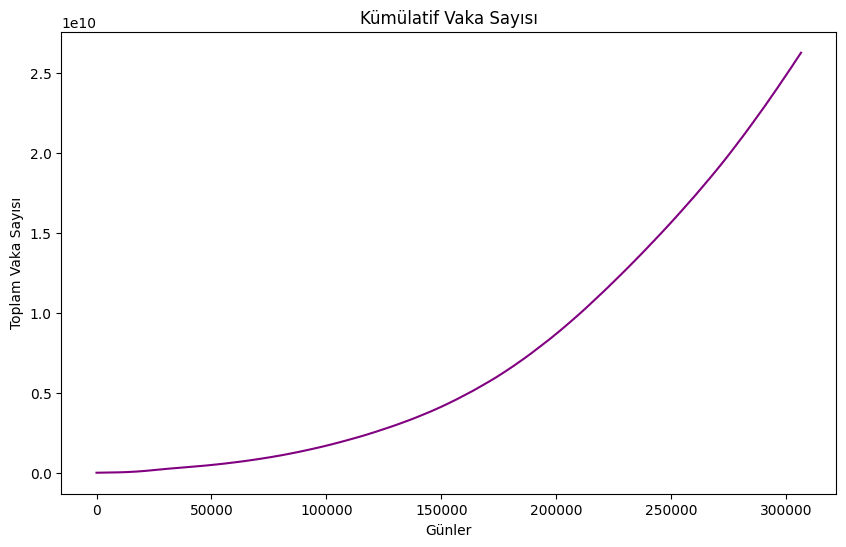

In [55]:
# 6.5. Kümülatif Vaka Sayısı
plt.figure(figsize=(10, 6))
plt.plot(data_with_na['Confirmed'].cumsum(), color='purple')
plt.title('Kümülatif Vaka Sayısı')
plt.xlabel('Günler')
plt.ylabel('Toplam Vaka Sayısı')
plt.show()

# 6.6 Vaka Dağılımı (Confirmed)
Bu histogram, COVID-19 vaka sayılarının dağılımını gösterir. Hangi aralıklarda vaka sayılarının yoğunlaştığını anlamamızı sağlar, böylece salgının seyrine yönelik daha etkili planlamalar yapılabilir.

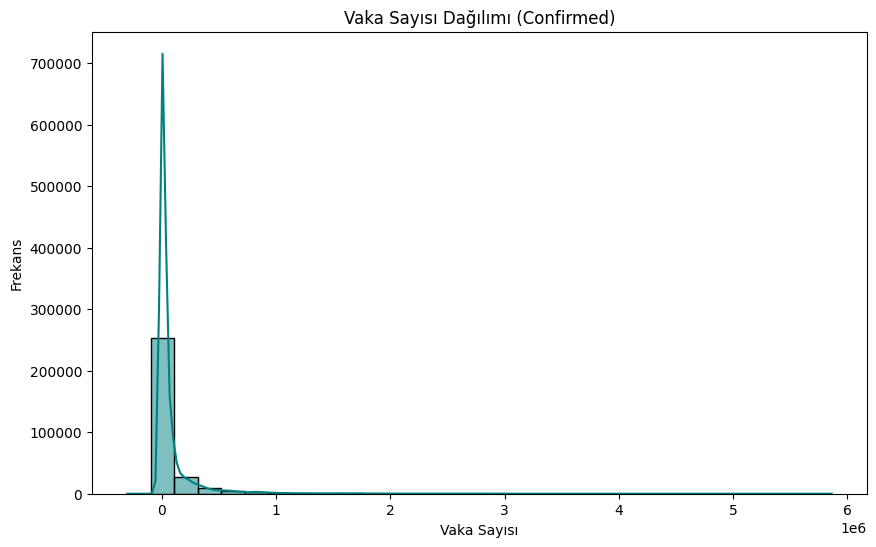

In [56]:
# 6.6. Vaka Dağılımı (Confirmed)
plt.figure(figsize=(10, 6))
sns.histplot(data_with_na['Confirmed'], kde=True, color='teal', bins=30)
plt.title('Vaka Sayısı Dağılımı (Confirmed)')
plt.xlabel('Vaka Sayısı')
plt.ylabel('Frekans')
plt.show()

# 7. Sonuç ve Öneriler

Bu projede, COVID-19 verileri analiz edilerek önemli çıkarımlarda bulunulmuştur. Öncelikle, en çok vaka görülen ülkeler analiz edilmiş ve bu ülkelerdeki vaka yoğunluğunun, sağlık politikalarının geliştirilmesine ve kaynakların etkili bir şekilde yönlendirilmesine ışık tutabileceği belirlenmiştir. Ayrıca, veri setine eksik veriler eklenerek bu eksiklikler başarıyla temizlenmiştir. Bu süreç, gerçek dünyada sıkça karşılaşılan eksik veri problemlerine yönelik deneyim kazanılmasını sağlamış ve eksikliklerin veri analizi süreçlerine olan etkisi değerlendirilmiştir.

Bunun yanında, veri setindeki değişkenler arasındaki ilişkiler incelenmiş ve özellikle vaka sayıları, ölüm oranları ve iyileşme oranları gibi kritik metrikler arasındaki korelasyonlar analiz edilmiştir. Ölüm oranları ve vaka sayıları arasındaki ilişkiler görselleştirilmiş ve bu dağılımlar, sağlık yönetimi stratejilerinin oluşturulmasında önemli bilgiler sunmuştur. Son olarak, bu verilerin sağlık sektöründe COVID-19'un yayılımını tahmin etmek, kaynak planlaması yapmak ve gelecekteki salgınlara yönelik stratejiler geliştirmek için kullanılabileceği sonucuna ulaşılmıştır.

### 1. Veri Setinin Potansiyel Kullanımı ve Problemi Tanımlama

Yaptığımız analizler ışığında, Novel Corona Virus 2019 Dataset'in aşağıdaki gibi bir probleme çözüm sağlayabileceği senaryolar belirlenmiştir:

- **Senaryo:** Bu veri seti, salgın yönetimi ve kaynak planlaması için kullanılabilir. Örneğin, sağlık bakanlıkları ve hastane yöneticileri, bu veriyi kullanarak vaka sayısındaki artış oranını analiz edebilir ve kaynak ihtiyaçlarını tahmin edebilir.
  - **Örnek Problem:** Bir bölgedeki yoğun vaka artışı sebebiyle sağlık hizmetlerinin kapasite planlaması.
  - **Çözüm Önerisi:** Vaka ve ölüm oranlarının analizine dayalı olarak tahmin modelleri kurulabilir. Bu modeller, gelecekteki hasta sayısını tahmin ederek hastane yatak kapasitesinin, ilaç ve sağlık personeli ihtiyacının planlanmasına yardımcı olabilir.

### 2. Önerilen Makine Öğrenimi Modelleri

Bu problemi çözmek için aşağıdaki makine öğrenimi algoritmalarından biri veya birkaçı kullanılabilir:

1. **Zaman Serisi Analizi (ARIMA)**
   - **Neden ARIMA?**
     - Vaka sayılarındaki zaman bazlı değişimleri analiz etmek için uygundur.
     - Zaman içindeki vaka artışlarını tahmin etmek için kullanılabilir.
   - **Kullanım Alanı:** Günlük vaka sayısındaki artışı modelleyerek, sağlık hizmetlerinin planlanmasında kullanılabilir.

2. **Regresyon Modelleri (Linear Regression veya Random Forest Regressor)**
   - **Neden Regresyon Modelleri?**
     - Vaka sayısı, ölüm oranı ve iyileşen oranı gibi değişkenlerin arasındaki ilişkileri tahmin etmek için güçlü bir yöntemdir.
     - Daha karmaşık modellerde (örneğin Random Forest Regressor) overfitting riski azaltılabilir.
   - **Kullanım Alanı:** Bir bölgedeki mevcut vaka sayılarına ve diğer sağlık göstergelerine dayanarak, ölüm oranları veya iyileşme oranları gibi sonuçları tahmin etmekte kullanılabilir.

3. **Derin Öğrenme Yöntemleri (LSTM - Long Short-Term Memory)**
   - **Neden LSTM?**
     - Zaman serisi veri analizi için çok güçlü bir derin öğrenme modelidir.
     - Uzun dönemli bağımlılıkları öğrenebilir ve vaka artış trendlerini daha doğru tahmin edebilir.
   - **Kullanım Alanı:** Gelecekteki vaka, ölüm ve iyileşme sayılarını tahmin ederek hükümet politikalarının planlanmasına yardımcı olabilir.

### 3. Önerilerin Genel Değerlendirmesi

- Önerilen yöntemler ve modeller, bu veri setinin sağlık sektörü, hükümetler ve salgın yönetim ekipleri tarafından karar verme süreçlerinde kullanılmasını sağlayabilir.
- Örneğin, ARIMA veya LSTM modeli kullanılarak vaka artışı tahmin edilip bölgelerdeki ihtiyaçlar öngörülebilir.
- Regresyon modelleriyle, ölüm oranlarını tahmin ederek risk altındaki bölgeler belirlenebilir ve müdahale stratejileri geliştirilebilir.

Sonuç olarak, bu veri seti doğru analiz yöntemleri ve algoritmalar kullanıldığında, COVID-19 gibi salgınların yönetiminde stratejik bir araç olarak değerlendirilebilir.
